
<center>

#    <br/>

# **Data Science Lab** <br/>


**Master's Degree in Data Science (A.Y. 2023/2024)**<br/>
**University of Milano - Bicocca**<br/>
<br/>

Yasmine Khajjou  909604<br/>
Martina Panto'   901346<br/>
Francesca Del Giudice  912367<br/>
Gaia Righetti  912465<br/>


# **Libraries**

In [ ]:
import pandas as pd

import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

import plotly.express as px
import plotly.figure_factory as ff
import plotly.graph_objects as go
from plotly.subplots import make_subplots

from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR

from statsmodels.tsa.arima.model import ARIMA
from itertools import product
import warnings

In [ ]:
pip install pmdarima

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 28.3 MB/s eta 0:00:00


In [ ]:
import pmdarima as pm

# **Data Uploading**

In [ ]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
file_path = '/content/drive/MyDrive/FOTN 2011-2023 Score Data.csv'

dff= pd.read_csv(file_path, delimiter=',', header=0)

# **Data Processing**

In [ ]:
dff.head()

,Country,Edition,Status,A1,A2,A3,A4,A5,A: Obstacles to Access,B1,...,C1,C2,C3,C4,C5,C6,C7,C8,C: Violations of User Rights,Total country score
0,Angola,2023,PF,2.0,1.0,5.0,3.0,1.0,12,6.0,...,2.0,1.0,3.0,3.0,2.0,3.0,3.0,2.0,19,59
1,Angola,2022,PF,1.0,1.0,5.0,3.0,1.0,11,6.0,...,2.0,1.0,4.0,3.0,2.0,3.0,4.0,2.0,21,61
2,Angola,2021,PF,2.0,1.0,5.0,3.0,1.0,12,6.0,...,2.0,1.0,4.0,3.0,2.0,3.0,4.0,1.0,20,62
3,Angola,2020,PF,1.0,1.0,5.0,3.0,1.0,11,6.0,...,2.0,1.0,4.0,3.0,2.0,3.0,4.0,2.0,21,62
4,Angola,2019,PF,2.0,1.0,5.0,3.0,1.0,12,6.0,...,2.0,1.0,4.0,3.0,3.0,3.0,4.0,2.0,22,64


In [ ]:
# Get summary statistics
print("\nSummary Statistics:")
dff.describe(include='all')


Summary Statistics:


,Country,Edition,Status,A1,A2,A3,A4,A5,A: Obstacles to Access,B1,...,C1,C2,C3,C4,C5,C6,C7,C8,C: Violations of User Rights,Total country score
count,809,809.000000,809,340.000000,340.000000,340.000000,340.000000,340.000000,809.000000,340.000000,...,340.000000,340.000000,340.000000,340.000000,340.000000,340.000000,340.000000,340.000000,809.000000,809.000000
unique,72,NaN,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,Zimbabwe,NaN,PF,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,13,NaN,364,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,2017.436341,NaN,4.070588,1.485294,4.338235,3.405882,1.411765,14.093943,3.873529,...,2.408824,1.311765,2.838235,2.400000,2.020588,2.314706,2.500000,1.441176,18.281829,52.962917
std,NaN,3.608806,NaN,1.635075,0.839522,1.658182,1.485414,1.312919,5.678784,1.805892,...,1.751673,0.923238,1.651050,0.924271,1.158343,1.454650,1.315889,0.786733,8.464818,20.776775
min,NaN,2011.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000
25%,NaN,2014.000000,NaN,3.000000,1.000000,3.000000,3.000000,0.000000,11.000000,3.000000,...,1.000000,1.000000,2.000000,2.000000,1.000000,1.000000,2.000000,1.000000,11.000000,36.000000
50%,NaN,2018.000000,NaN,4.000000,1.000000,5.000000,4.000000,1.000000,14.000000,4.000000,...,2.000000,1.000000,3.000000,3.000000,2.000000,3.000000,3.000000,1.000000,19.000000,55.000000
75%,NaN,2021.000000,NaN,5.000000,2.000000,6.000000,4.000000,2.000000,18.000000,5.250000,...,4.000000,2.000000,4.000000,3.000000,3.000000,3.000000,3.000000,2.000000,25.000000,70.000000


In [ ]:
# Display the column names
print("\nColumn names:")
dff.columns


Column names:


Index(['Country', 'Edition', 'Status', 'A1', 'A2', 'A3', 'A4', 'A5',
       'A: Obstacles to Access', 'B1', 'B2', 'B3', 'B4', 'B5', 'B6', 'B7',
       'B8', 'B: Limits on Content', 'C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7',
       'C8', 'C: Violations of User Rights', 'Total country score'],
      dtype='object')

In [ ]:
# Renaming columns in dff and selecting relevant columns A, B, C
dff.rename(columns={
    'A: Obstacles to Access': 'A',
    'B: Limits on Content': 'B',
    'C: Violations of User Rights': 'C',
    'Total country score': 'Total',
    'Edition' : 'Year'
}, inplace=True)

print("\nUpdated column names for dff:")
dff.columns


Updated column names for dff:


Index(['Country', 'Year', 'Status', 'A1', 'A2', 'A3', 'A4', 'A5', 'A', 'B1',
       'B2', 'B3', 'B4', 'B5', 'B6', 'B7', 'B8', 'B', 'C1', 'C2', 'C3', 'C4',
       'C5', 'C6', 'C7', 'C8', 'C', 'Total'],
      dtype='object')

In [ ]:
# Convert 'Year' to datetime and extract the year part
dff['Year'] = pd.to_datetime(dff['Year'], format='%Y').dt.year

# Set 'Year' as the index
dff.set_index('Year', inplace=True)

In [ ]:
# Check if 'Year' is the index
print("\nIndex after setting 'Year':")
dff.index


Index after setting 'Year':


Index([2023, 2022, 2021, 2020, 2019, 2018, 2017, 2016, 2015, 2014,
       ...
       2020, 2019, 2018, 2017, 2016, 2015, 2014, 2013, 2012, 2011],
      dtype='int32', name='Year', length=809)

In [ ]:
# Reset 'Year' as a column
dff.reset_index(inplace=True)

# **Exploratory Data Analysis**


In [ ]:
print("\nUpdated column names for dff:")
dff.columns


Updated column names for dff:


Index(['Year', 'Country', 'Status', 'A1', 'A2', 'A3', 'A4', 'A5', 'A', 'B1',
       'B2', 'B3', 'B4', 'B5', 'B6', 'B7', 'B8', 'B', 'C1', 'C2', 'C3', 'C4',
       'C5', 'C6', 'C7', 'C8', 'C', 'Total'],
      dtype='object')

In [ ]:
# Display the unique values for the 'Status' column
print("\nUnique values in 'Status' column:")
print(dff['Status'].unique())

# Count the occurrences of each status
print("\nCount of each status:")
print(dff['Status'].value_counts())

# Check for duplicate values in the dataset
print("\nDuplicate values:")
dff.duplicated().any()


Unique values in 'Status' column:
['PF' 'F' 'NF']

Count of each status:
Status
PF    364
NF    239
F     206
Name: count, dtype: int64

Duplicate values:


False

In [ ]:
# Count the number of null values in each column
null_counts = dff.isnull().sum()

# Display the count of null values
print("\nCount of null values in each column:")
null_counts


Count of null values in each column:


,0
Year,0
Country,0
Status,0
A1,469
A2,469
A3,469
A4,469
A5,469
A,0
B1,469


# **Data Visualisation**

**How many Countries are Completely Free, Partially Free, Not Free ?**

Percentages analysis on Freedom on the Net's Data


In [ ]:
# Calculate the values of 'Status'
status = dff['Status'].value_counts().reindex(['F', 'PF', 'NF'])

# Mapping category names
category_labels = {'F': 'Completely Free', 'PF': 'Partly Free', 'NF': 'Not Free'}

# Create the pie chart using Plotly Express
fig = px.pie(values=status, names=status.index, title='Freedom Status',
             color=status.index,
             color_discrete_map={'F': 'green', 'PF': 'orange', 'NF': 'red'})

# Update traces to show percentages and labels inside the sections
fig.update_traces(textposition='inside', textinfo='label+percent',
                  insidetextfont=dict(color='white'),
                  hovertemplate='%{label}: %{percent:.2%} <br>(%{value} votes)',
                  texttemplate=[category_labels[k] + '<br>' + '{:.2f}%'.format(v / sum(status) * 100) for k, v in zip(status.index, status.values)])

# Set the layout of the graph
fig.update_layout(paper_bgcolor='rgb(248, 248, 255)',
                  plot_bgcolor='rgb(248, 248, 255)',
                  showlegend=False)

# Show the graph
fig.show()

This pie chart provides a quick overview of the distribution of country statuses. The majority of countries are Partly Free, while the proportions of Completely Free and Not Free countries are similar.

**Trendline of Average scores for Indicators A, B, and C over Years**

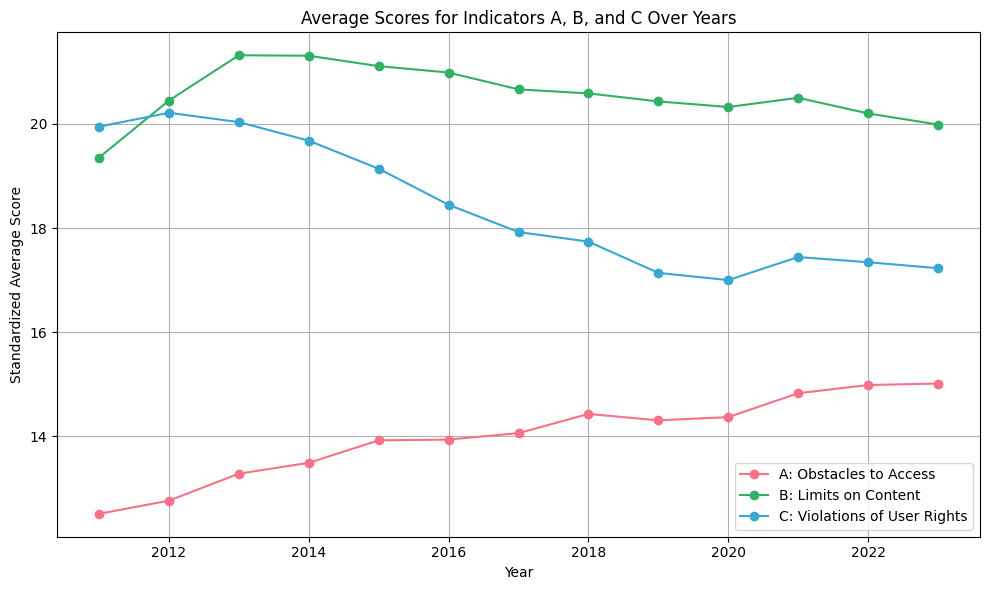

In [ ]:
# Selecting numeric columns to calculate mean
numeric_cols = ['A', 'B', 'C']

# Calculate average scores for indicators A, B, and C by year
avg_scores_by_year = dff.groupby('Year')[numeric_cols].mean()

# Plotting
palette = sns.color_palette("husl", 8)
plt.figure(figsize=(10, 6))

plt.plot(avg_scores_by_year.index, avg_scores_by_year['A'] ,marker='o', linestyle='-', color=palette[0], label='A: Obstacles to Access')
plt.plot(avg_scores_by_year.index, avg_scores_by_year['B'],marker='o', linestyle='-', color=palette[3], label='B: Limits on Content')
plt.plot(avg_scores_by_year.index,avg_scores_by_year['C'],marker='o', linestyle='-', color=palette[5], label='C: Violations of User Rights')

plt.title('Average Scores for Indicators A, B, and C Over Years')
plt.xlabel('Year')
plt.ylabel('Standardized Average Score')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

**Average Scores for Indicators A, B, and C Over Years**

* A: Obstacles to Access (0–25 points):
cThe plot reveals a gradual increase in scores related to obstacles to internet access from the early 2010s onwards. This upward trend suggests ongoing challenges in infrastructure development and affordability, which are critical factors affecting internet accessibility globally. As countries strive to expand digital connectivity, addressing these obstacles becomes crucial for ensuring equitable access to online resources and opportunities.

* B: Limits on Content (0–35 points):
From 2011 to 2017, there is a noticeable upward trajectory in scores reflecting limits on online content. This period likely saw increased regulatory measures and technological advancements in content control, impacting the freedom of expression and access to diverse viewpoints online. The plateau in scores post-2017 indicates a stabilization in these restrictions, possibly influenced by evolving legal frameworks or shifts in governmental approaches to online censorship.

* C: Violations of User Rights (0–40 points):
In contrast to the other indicators, violations of user rights show a promising downward trend over the years. This decline suggests positive developments in legal protections and regulatory practices aimed at safeguarding internet users' rights to privacy, freedom of expression, and access to information. Improved judicial independence and international scrutiny may have contributed to this positive trajectory in safeguarding digital rights.

**Barplot with Countries with Highest and Lowest Scores**

In [ ]:
avg_scores = dff.groupby('Country')['Total'].mean().reset_index()

# Sort by 'Total country score' to find the lowest and highest scores
avg_scores_sorted = avg_scores.sort_values(by='Total')

# Top 5 countries with the highest and lowest overall scores
highest_scores = avg_scores_sorted.tail(5)
lowest_scores = avg_scores_sorted.head(5)

colorscale_highest = [[0, 'orange'], [1, 'green']]
colorscale_lowest = [[0, 'red'],[1, 'orange']]

# Function to format numbers to two decimal places
def format_number(x):
    return '{:.2f}'.format(x)

# Create figure for lowest scores
fig_lowest = go.Figure(go.Bar(
    x=lowest_scores['Total'],  # Use raw numbers for alignment
    y=lowest_scores['Country'],
    orientation='h',
    opacity=0.6,
    text=lowest_scores['Total'].map(format_number),  # Format numbers to two decimal places
    textposition='outside',
    name='Lowest Scores',
    marker=dict(
        color=lowest_scores['Total'],
        colorscale=colorscale_lowest,
        colorbar=dict(title="Freedom Value")
    )
))

# Update layout for fig_lowest to ensure bars are sorted with the lowest at the top
fig_lowest.update_layout(
    title='Top 5 Countries with Lowest Overall Scores',
    xaxis_title='Average Total Country Score',
    yaxis_title='Country',
    xaxis=dict(range=[0, 100], tickmode='linear', dtick=10),  # Set the range for x-axis from 0 to 100
    yaxis=dict(categoryorder='total ascending'),  # Ensure the lowest score is at the top
    hovermode='closest',
    bargap=0.1,  # Gap between bars
    margin=dict(l=150, r=50, t=50, b=50),  # Adjust margins to reduce empty space
    plot_bgcolor='white',  # Set the background color to white
    paper_bgcolor='white',  # Set the surrounding paper color to white
    shapes=[  # Add a black border around the plot area
        dict(
            type='rect',
            xref='paper', yref='paper',
            x0=0, y0=0, x1=1, y1=1,
            line=dict(color='black', width=2)
        )
    ],
    showlegend=False  # Hide legend if not needed
)

# Create figure for highest scores
fig_highest = go.Figure(go.Bar(
    x=highest_scores['Total'],  # Use raw numbers for alignment
    y=highest_scores['Country'],
    orientation='h',
    opacity=0.6,
    text=highest_scores['Total'].map(format_number),  # Format numbers to two decimal places
    textposition='outside',
    name='Highest Scores',
    marker=dict(
        color=highest_scores['Total'],
        colorscale=colorscale_highest,
        colorbar=dict(title="Freedom Value")
    )
))

fig_highest.update_layout(
    title='Top 5 Countries with Highest Overall Scores',
    xaxis_title='Average Total Country Score',
    yaxis_title='Country',
    xaxis=dict(range=[0, 100], tickmode='linear', dtick=10),  # Set the range for x-axis from 0 to 100
    hovermode='closest',
    bargap=0.1,  # Gap between bars
    margin=dict(l=150, r=50, t=50, b=50),  # Adjust margins to reduce empty space
    plot_bgcolor='white',  # Set the background color to white
    paper_bgcolor='white',  # Set the surrounding paper color to white
    shapes=[  # Add a black border around the plot area
        dict(
            type='rect',
            xref='paper', yref='paper',
            x0=0, y0=0, x1=1, y1=1,
            line=dict(color='black', width=2)
        )
    ],
    showlegend=False  # Hide legend if not needed
)

# Plotting top and bottom 5 countries using bar plots
plt.figure(figsize=(12, 8))

# Display both figures
fig_highest.show()
fig_lowest.show()

<Figure size 1200x800 with 0 Axes>



**Top 5 Countries with Highest Scores:**
1. **Iceland**: Iceland is often recognized for its robust internet infrastructure and high levels of internet freedom. Its strong legal protections and minimal restrictions contribute to its high score.
   
2. **Estonia**: Estonia is known for its advanced digital society and extensive e-governance initiatives. It boasts high internet penetration rates and strong protections for online freedoms.
   
3. **Costa Rica**: Costa Rica has made significant strides in internet accessibility and digital rights, with relatively low censorship and strong legal frameworks supporting internet freedom.
   
4. **Canada**: Canada consistently ranks high in internet freedom indices due to its open internet policies, diverse media landscape, and strong protections for free expression.
   
5. **Germany**: Germany balances strong legal protections for online freedoms with efforts to combat hate speech and misinformation, contributing to its high ranking.

**Bottom 5 Countries with Lowest Scores:**
1. **China**: China's strict censorship regime, including the Great Firewall, heavily restricts access to international websites and platforms, leading to very low scores in internet freedom assessments.
   
2. **Iran**: Iran exercises extensive control over online content and communication channels, imposing strict regulations that limit internet freedom and access to information.
   
3. **Syria**: Syria's internet is heavily monitored and censored by the government, especially during periods of political unrest, resulting in very low scores for internet freedom.
   
4. **Cuba**: Cuba has limited access to the internet, with government controls over infrastructure and content. The internet is tightly regulated, contributing to its low score in internet freedom.
   
5. **Ethiopia**: Ethiopia has faced challenges in internet freedom, including government shutdowns and restrictions on social media platforms, impacting access and freedom of expression.

These rankings reflect the varying degrees of internet freedom and government control over online activities in different countries. Countries at the top typically have strong legal protections, open access to information, and minimal censorship, while those at the bottom often face extensive government control, censorship, and restrictions on online activities.

**Stacked Bar Charts with percentages of the Indicators contributing to the Final Score**

Analysis on the Top and the Bottom countries

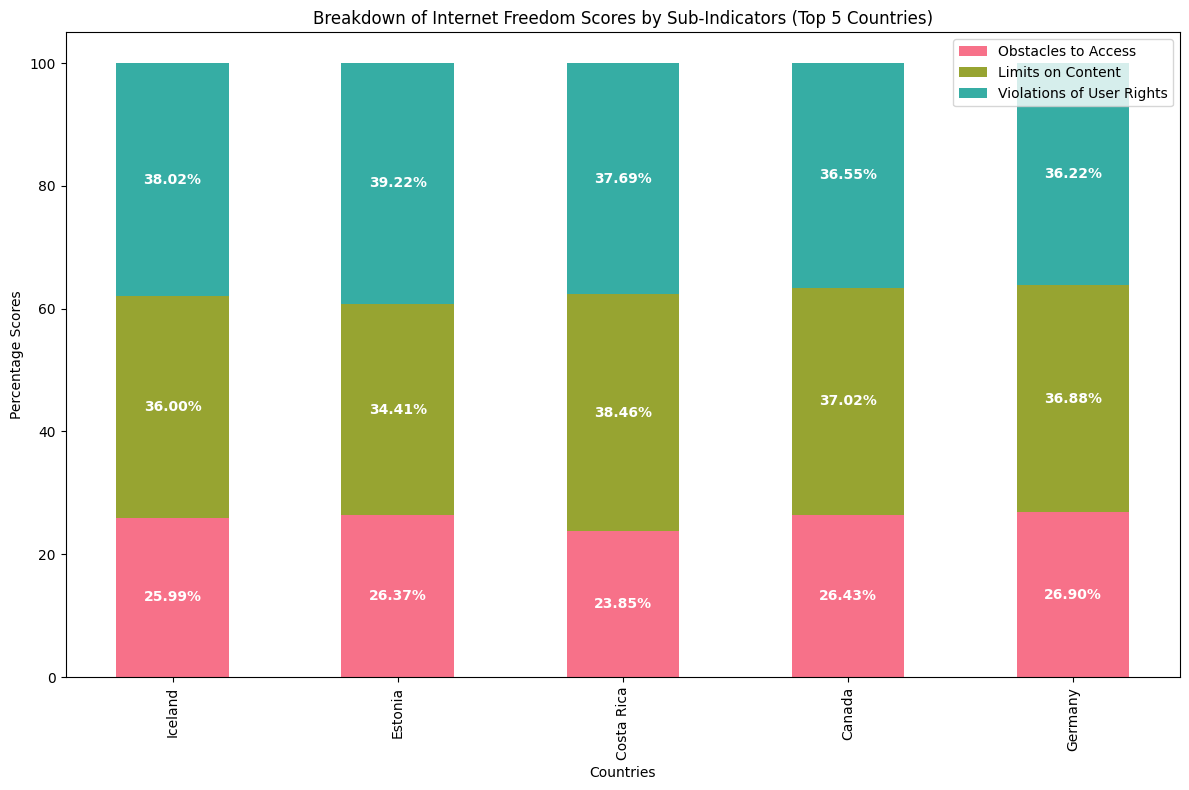

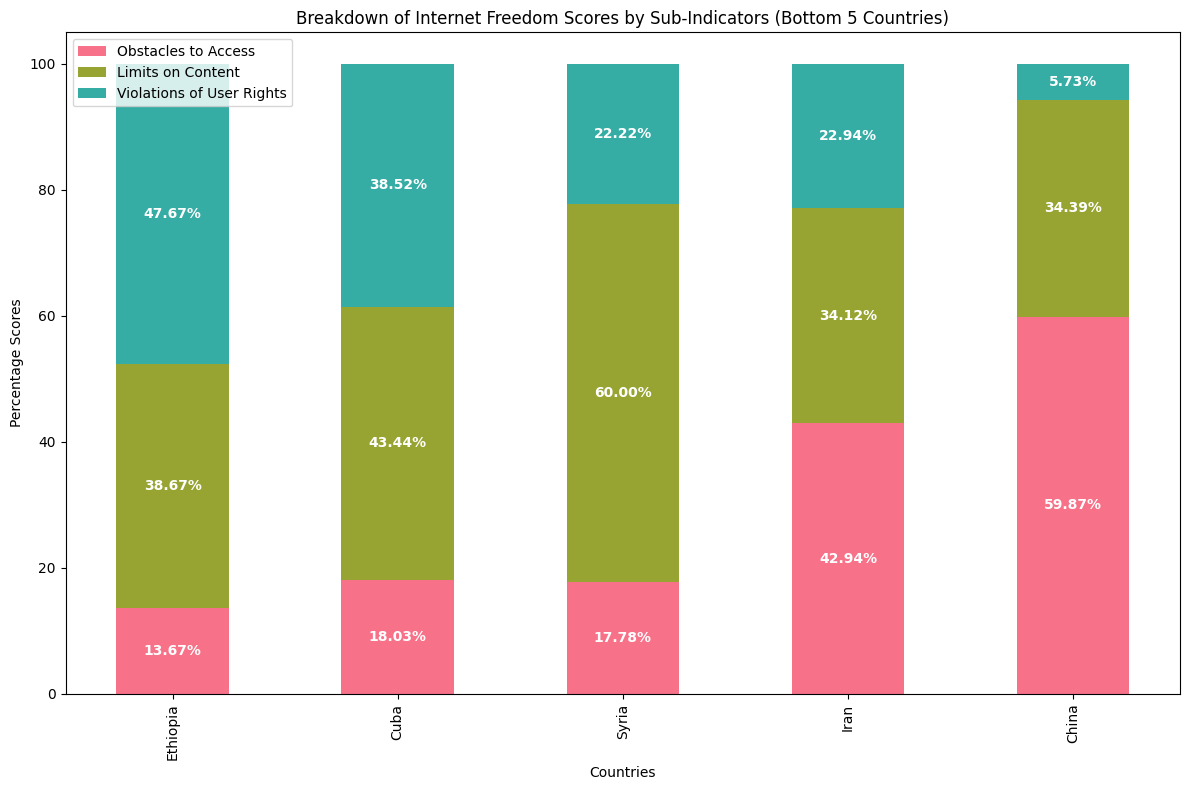

In [ ]:
# Aggregate scores across all years for each country
avg_scores_by_country = dff.groupby('Country')[['A', 'B', 'C', 'Total']].mean().reset_index()

# Normalize scores to percentages
avg_scores_by_country['Obstacles to Access (%)'] = avg_scores_by_country['A'] / avg_scores_by_country['Total'] * 100
avg_scores_by_country['Limits on Content (%)'] = avg_scores_by_country['B'] / avg_scores_by_country['Total'] * 100
avg_scores_by_country['Violations of User Rights (%)'] = avg_scores_by_country['C'] / avg_scores_by_country['Total'] * 100

# Sort by Total score (optional, for better visualization)
avg_scores_by_country = avg_scores_by_country.sort_values(by='Total', ascending=False)

# Define the husl color palette with 8 colors
husl_palette = sns.color_palette("husl", 8)

# Function to plot stacked bar chart
def plot_stacked_bar(subset, title):
    plt.figure(figsize=(12, 8))
    bar_positions = np.arange(len(subset))

    # Stacked bars with custom color palette
    plt.bar(bar_positions, subset['Obstacles to Access (%)'], width=0.5, label='Obstacles to Access', color=husl_palette[0])
    plt.bar(bar_positions, subset['Limits on Content (%)'], width=0.5, label='Limits on Content',
            bottom=subset['Obstacles to Access (%)'], color=husl_palette[2])
    plt.bar(bar_positions, subset['Violations of User Rights (%)'], width=0.5, label='Violations of User Rights',
            bottom=subset['Obstacles to Access (%)'] + subset['Limits on Content (%)'], color=husl_palette[4])

    # Annotate each bar with its respective percentage value
    for i in range(len(subset)):
        plt.text(bar_positions[i], subset['Obstacles to Access (%)'].iloc[i] / 2, f"{subset['Obstacles to Access (%)'].iloc[i]:.2f}%",
                 ha='center', va='center', color='white', fontsize=10, fontweight='bold')
        plt.text(bar_positions[i], subset['Obstacles to Access (%)'].iloc[i] + subset['Limits on Content (%)'].iloc[i] / 2,
                 f"{subset['Limits on Content (%)'].iloc[i]:.2f}%", ha='center', va='center', color='white', fontsize=10, fontweight='bold')
        plt.text(bar_positions[i], subset['Obstacles to Access (%)'].iloc[i] + subset['Limits on Content (%)'].iloc[i] +
                 subset['Violations of User Rights (%)'].iloc[i] / 2, f"{subset['Violations of User Rights (%)'].iloc[i]:.2f}%",
                 ha='center', va='center', color='white', fontsize=10, fontweight='bold')

    # Customizing the plot
    plt.xlabel('Countries')
    plt.ylabel('Percentage Scores')
    plt.title(title)
    plt.xticks(bar_positions, subset['Country'], rotation=90)
    plt.legend()
    plt.tight_layout()
    plt.show()

# Subset data for top and bottom 5 countries based on aggregated scores
top_countries = avg_scores_by_country.head(5)
bottom_countries = avg_scores_by_country.tail(5)

# Plotting stacked bar charts for top and bottom 5 countries
plot_stacked_bar(top_countries, 'Breakdown of Internet Freedom Scores by Sub-Indicators (Top 5 Countries)')
plot_stacked_bar(bottom_countries, 'Breakdown of Internet Freedom Scores by Sub-Indicators (Bottom 5 Countries)')

**Breakdown of Internet Freedom Scores by Sub-Indicators**
<br>
<br>
The top countries exhibit a relatively equal distribution of percentages across all three sub-indicators. This suggests a balanced approach where each aspect—Obstacles to Access, Limits on Content, and Violations of User Rights—contributes nearly equally to their total internet freedom scores.

The uniform distribution implies that these countries might adhere closely to international norms and regulations regarding internet freedom. This consistency across indicators indicates a structured approach to maintaining a free and open internet environment without disproportionately emphasizing one aspect over others.

The uniform distribution of scores implies that these countries likely prioritize a holistic approach to internet freedom, addressing multiple aspects equally. This approach may contribute to their higher overall scores and suggests a commitment to upholding comprehensive internet rights and freedoms.

<br>
<br>



In contrast to the top countries, the bottom-ranked countries display varying percentages for each sub-indicator.

For example:
Ethiopia shows a significantly high percentage of its total score attributed to Violations of User Rights (47.6%). This indicates that a substantial portion of its low score is due to issues related to user rights violations.
China, on the other hand, allocates a relatively smaller percentage (5.73%) to Violations of User Rights compared to its other sub-indicators. This suggests that while China's overall score is low, its challenges may stem more from other factors such as Obstacles to Access or Limits on Content.

<br>
The uniform distribution of scores implies that these countries likely prioritize a holistic approach to internet freedom, addressing multiple aspects equally. This approach may contribute to their higher overall scores and suggests a commitment to upholding comprehensive internet rights and freedoms.

The varied distribution of scores indicates that the reasons for their low scores are multifaceted and may differ significantly from country to country. High percentages in specific sub-indicators, such as Violations of User Rights in Ethiopia, highlight pronounced challenges in these areas that contribute significantly to their overall low scores.

**Heatmap about the Status of Freedom of the Net across Countries over Years**

In [ ]:
# Filter the data for countries/territories that have more than one unique status value
ax = dff.groupby('Country').filter(lambda x: x['Status'].nunique() > 1)

# Pivot the dataframe to have years as columns and countries as rows, sorted in reverse alphabetical order
heatmap_data = ax.pivot(index='Country', columns='Year', values='Status').sort_index(ascending=False)

# Create a DataFrame for text labels
text_data = heatmap_data.copy()
for row in text_data.index:
    for col in text_data.columns:
        text_data.at[row, col] = f"{col} {heatmap_data.at[row, col]}"

# Map colors for Status: F (Free) in green, PF (Partly Free) in yellow, NF (Not Free) in red
status_numeric = {'F': 1, 'PF': 2, 'NF': 3}
heatmap_data_numeric = heatmap_data.replace(status_numeric)

# Create the heatmap
fig = go.Figure(data=go.Heatmap(
    z=heatmap_data_numeric.values,
    x=heatmap_data_numeric.columns,
    y=heatmap_data_numeric.index,
    text=text_data.values,
    hoverinfo='text',
    colorscale=[
        [0.0, 'green'],
        [0.33, 'green'],
        [0.33, 'orange'],
        [0.66, 'orange'],
        [0.66, 'red'],
        [1.0, 'red']
    ]
))

# Add annotations for text
annotations = []
for i, row in enumerate(heatmap_data.index):
    for j, col in enumerate(heatmap_data.columns):
        annotations.append(
            dict(
                x=col,
                y=row,
                text=heatmap_data.at[row, col],
                xref='x',
                yref='y',
                showarrow=False,
                font=dict(color='black')
            )
        )

fig.update_layout(
    title='Status of Freedom of the Net Across Countries and Territories Over Years',
    title_font_size=22,
    paper_bgcolor='rgb(248, 248, 255)',
    plot_bgcolor='rgb(248, 248, 255)',
    xaxis=dict(
        title='Year',
        tickmode='linear'  # Ensure all years are displayed
    ),
    yaxis=dict(
        title='Country/Territory'
    ),
    annotations=annotations
)

# Show the plot
fig.show()

This table highlights the specific years when changes in status occurred, with the color coding representing the level of freedom:

green indicates Completely Free, yellow denotes Partly Free, and red signifies Not Free.

# **Anomaly Detection**

Reload the dataset to have all available countries.

In [ ]:
file_path = '/content/drive/MyDrive/FOTN 2011-2023 Score Data.csv'

dff= pd.read_csv(file_path, delimiter=',', header=0)

In [ ]:
# Renaming columns in dff and selecting relevant columns A, B, C
dff.rename(columns={
    'A: Obstacles to Access': 'A',
    'B: Limits on Content': 'B',
    'C: Violations of User Rights': 'C',
    'Total country score': 'Total',
    'Edition' : 'Year'
}, inplace=True)

print("\nUpdated column names for dff:")
dff.columns


Updated column names for dff:


Index(['Country', 'Year', 'Status', 'A1', 'A2', 'A3', 'A4', 'A5', 'A', 'B1',
       'B2', 'B3', 'B4', 'B5', 'B6', 'B7', 'B8', 'B', 'C1', 'C2', 'C3', 'C4',
       'C5', 'C6', 'C7', 'C8', 'C', 'Total'],
      dtype='object')

**Moving Average Method to Detect Anomalies**

The Moving Average method to detect anomalies involves the following steps:

1. Calculate Moving Average: Compute the moving average of a data series over a specified window size. The moving average smooths out short-term fluctuations and highlights longer-term trends.

2. Compute Deviations: Calculate the deviation of each data point from the moving average. This deviation can be measured in terms of absolute difference or percentage difference.

3. Identify Anomalies: Define a threshold for what constitutes a significant deviation. Data points with deviations exceeding this threshold are flagged as anomalies.


In [ ]:
# Function to detect deviations from trend
def detect_trend_deviations(df, window_size=3, threshold=8):
    anomalies = []
    grouped = df.groupby('Country')

    for country, group in grouped:
        if len(group) < window_size:
            # Skip countries with less than window_size years of data
            continue

        # Calculate moving average (trend) using rolling window
        group['MovingAverage'] = group['Total'].rolling(window=window_size, min_periods=1).mean()

        # Calculate deviation from the moving average
        group['Deviation'] = np.abs(group['Total'] - group['MovingAverage'])

        # Identify years where deviation exceeds the threshold
        anomalies_mask = group['Deviation'] >= threshold
        anomalies_data = group[anomalies_mask]

        anomalies.append(anomalies_data)

    if anomalies:
        anomalies_df = pd.concat(anomalies)
    else:
        anomalies_df = pd.DataFrame(columns=df.columns)  # Empty DataFrame if no anomalies found

    return anomalies_df

# Detect trend deviations in dff with a threshold of 10 points
anomalies_df = detect_trend_deviations(dff, threshold=8)

# Print detected anomalies
if not anomalies_df.empty:
    print("Detected Trend Deviations:")
else:
    print("No trend deviations detected.")

anomalies_df[['Country', 'Year', 'Total']]

Detected Trend Deviations:


,Country,Year,Total
475,Myanmar,2020,31
476,Myanmar,2019,36
483,Myanmar,2012,25
484,Myanmar,2011,12
613,Sri Lanka,2014,42
657,The Gambia,2017,33
673,Tunisia,2011,19


**Plot with the trendline of total Internet Freedom Score over Years**

The previous analysis identified Myanmar, Sri Lanka, Gambia, and Tunisia as countries with the most significant anomalies. The following trendline plot illustrates the Internet Freedom Scores for these countries from 2011 to 2023.

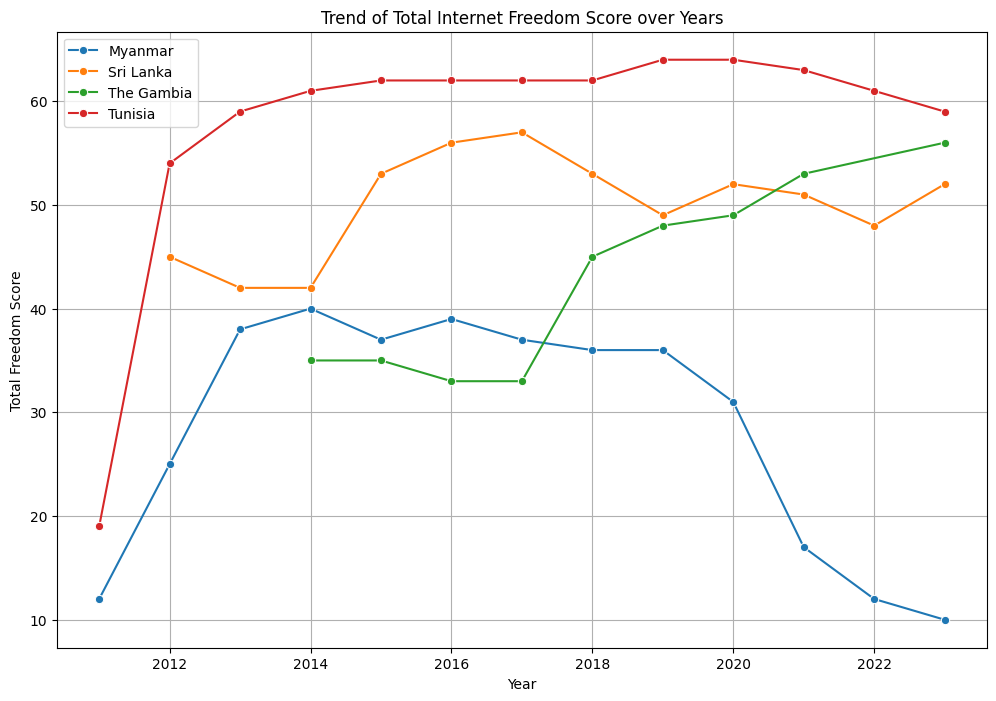

In [ ]:
# Selecting countries and filtering for them
countries = ['Myanmar', 'Sri Lanka', 'The Gambia', 'Tunisia']
dff_countries = dff[dff['Country'].isin(countries)]

# Plotting the trendline through the years for each country
plt.figure(figsize=(12, 8))

# Iterate over each country
for country in countries:
    # Filter data for the current country
    country_data = dff_countries[dff_countries['Country'] == country]

    # Plotting the trendline
    sns.lineplot(x='Year', y='Total', data=country_data, label=country, marker='o')

# Adding labels and title
plt.title('Trend of Total Internet Freedom Score over Years')
plt.xlabel('Year')
plt.ylabel('Total Freedom Score')

# Show legend
plt.legend()

# Display the plot
plt.grid(True)
plt.show()

Detected Anomalies for Tunisia:
     Year  Total  Deviation
673  2011     19       25.0


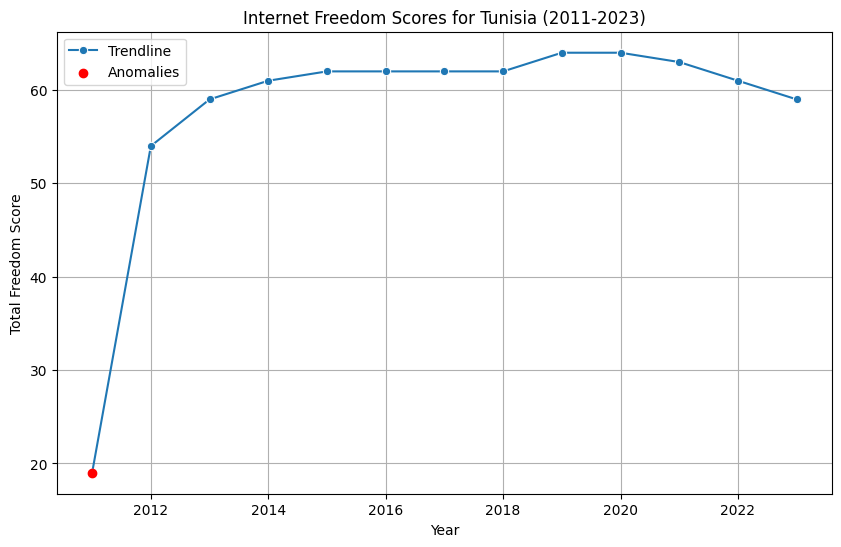

In [ ]:
# Filter data for Tunisia, Morocco, Algeria, and Egypt
NA_data = dff[dff['Country'].isin(['Tunisia', 'Morocco', 'Algeria', 'Egypt'])]

# Detect anomalies in the filtered data for Tunisia
tunisia_data = NA_data[NA_data['Country'] == 'Tunisia']
tunisia_anomalies = detect_trend_deviations(tunisia_data, threshold=8)

# Print detected anomalies for Tunisia
print("Detected Anomalies for Tunisia:")
print(tunisia_anomalies[['Year', 'Total', 'Deviation']])

# Plot Tunisia's trendline with anomalies
plt.figure(figsize=(10, 6))
sns.lineplot(x='Year', y='Total', data=tunisia_data, label='Trendline', marker='o')
plt.scatter(tunisia_anomalies['Year'], tunisia_anomalies['Total'], color='red', label='Anomalies', zorder=5)
plt.title('Internet Freedom Scores for Tunisia (2011-2023)')
plt.xlabel('Year')
plt.ylabel('Total Freedom Score')
plt.legend()
plt.grid(True)
plt.show()



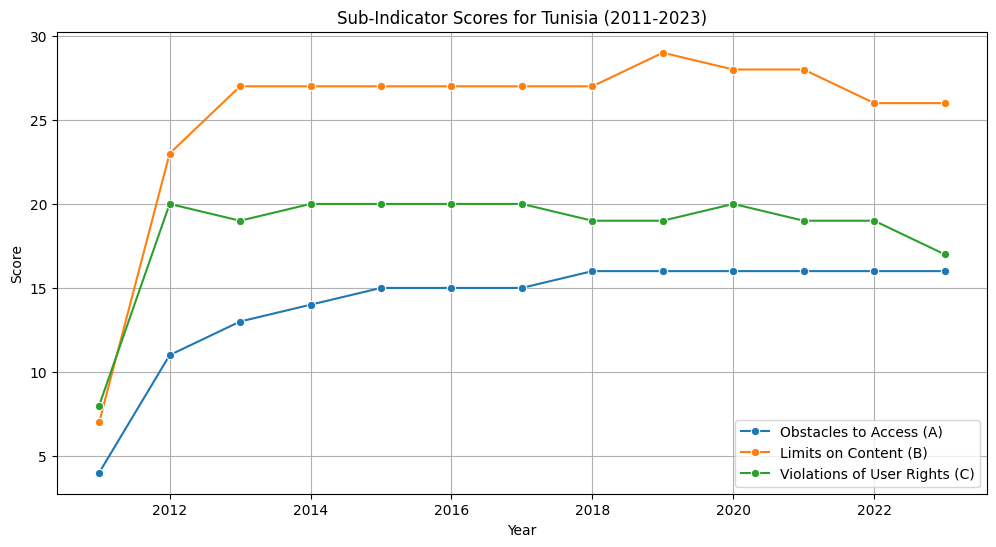

In [ ]:
# Plot trendlines for sub-indicators A, B, and C
plt.figure(figsize=(12, 6))

for col, label in zip(['A', 'B', 'C'], ['Obstacles to Access (A)', 'Limits on Content (B)', 'Violations of User Rights (C)']):
    sns.lineplot(x='Year', y=col, data=tunisia_data, marker='o', label=label)

plt.title('Sub-Indicator Scores for Tunisia (2011-2023)')
plt.xlabel('Year')
plt.ylabel('Score')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
# Adjust detect_trend_deviations to handle single-country data
def detect_trend_deviations_single(df, window_size=3, threshold=2):
    anomalies = []

    # Calculate moving average (trend) using rolling window
    df['MovingAverage'] = df['Total'].rolling(window=window_size, min_periods=1).mean()

    # Calculate deviation from the moving average
    df['Deviation'] = np.abs(df['Total'] - df['MovingAverage'])

    # Identify rows where deviation exceeds the threshold
    anomalies = df[df['Deviation'] >= threshold]

    return anomalies

# Detect anomalies for each sub-indicator
sub_indicator_anomalies = {}

for col in ['A', 'B', 'C']:
    # Rename the column to 'Total' for anomaly detection
    data = tunisia_data[['Year', col]].rename(columns={col: 'Total'})
    anomalies = detect_trend_deviations_single(data, threshold=2)
    sub_indicator_anomalies[col] = anomalies

# Combine anomalies for display
all_anomalies = pd.concat(
    [anomalies.assign(Indicator=col) for col, anomalies in sub_indicator_anomalies.items()],
    ignore_index=True
)

# Display detected anomalies
print("Detected Anomalies by Sub-Indicator:")
print(all_anomalies[['Year', 'Total', 'Deviation', 'Indicator']])



Detected Anomalies by Sub-Indicator:
   Year  Total  Deviation Indicator
0  2011      4   5.333333         A
1  2012     23   2.666667         B
2  2011      7  12.000000         B
3  2011      8   7.666667         C


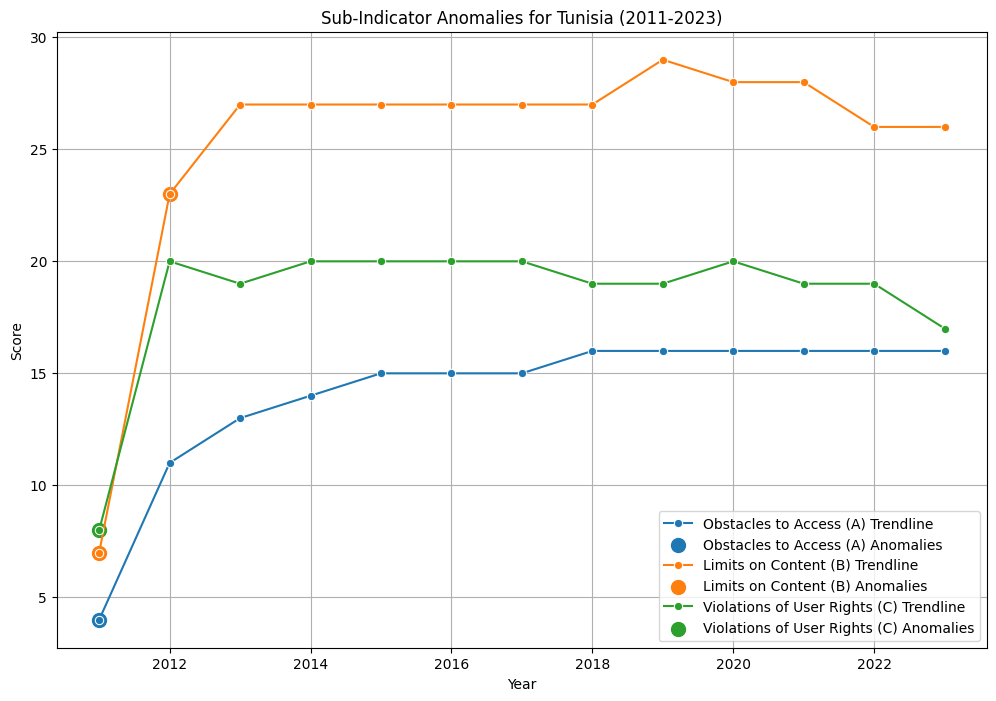

In [ ]:
# Plot anomalies for each sub-indicator
plt.figure(figsize=(12, 8))

for col, label in zip(['A', 'B', 'C'], ['Obstacles to Access (A)', 'Limits on Content (B)', 'Violations of User Rights (C)']):
    # Plot trendline
    sns.lineplot(x='Year', y=col, data=tunisia_data, marker='o', label=f"{label} Trendline")

    # Plot anomalies
    anomalies = sub_indicator_anomalies[col]
    plt.scatter(anomalies['Year'], anomalies['Total'], label=f"{label} Anomalies", s=100)

plt.title('Sub-Indicator Anomalies for Tunisia (2011-2023)')
plt.xlabel('Year')
plt.ylabel('Score')
plt.legend()
plt.grid(True)
plt.show()
